In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Переобученность модели

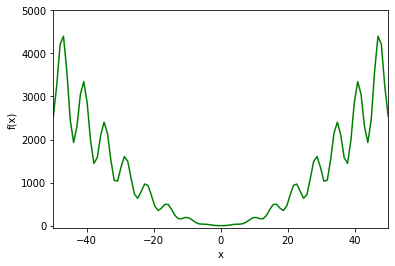

In [2]:
def f(x):return (x**2)*(np.sin(0.5*x)**2+1)
def f2(x):return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
dots = np.linspace(-50, 50, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-50, 5000)
plt.xlim(-50,50)

plt.plot(dots, f(dots), color='g')

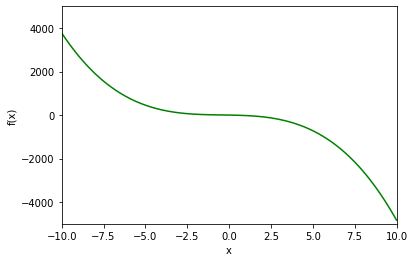

In [3]:
dots2 = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots2, f2(dots2), color='g')

In [4]:
np.random.seed(16)
x_data = np.random.uniform(-50, 50, 50)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 50)

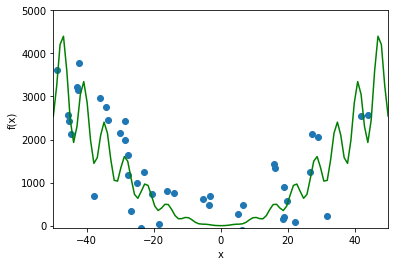

In [5]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-50, 5000)
plt.xlim(-50,50)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

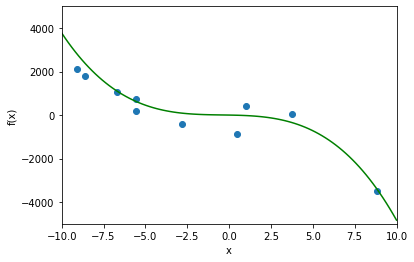

In [6]:
np.random.seed(16)
x_data2 = np.random.uniform(-10, 10, 10)
f_data2 = [f2(i) for i in x_data2] + np.random.uniform(-1000, 1000, 10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots2, f2(dots2), color='g')
plt.scatter(x_data2, f_data2)

In [7]:
def generate_features(x, max_power):
    x=x[:, np.newaxis]
    return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)

In [8]:
x_data

array([-27.67089208,   2.31633414,   5.07014566, -45.43980499,
       -13.92711647, -27.69190583,  18.87261618, -33.6268575 ,
       -42.96751332,  44.10108602,   6.36813802, -42.20076606,
        22.26405111, -34.15478265, -24.97186933, -20.65127439,
        19.66107142,  -3.5735912 , -28.49378563,  -5.31737379,
       -37.91212485,  41.76870077,   6.64463287,  -2.79806843,
       -18.54335754, -45.67842703,  25.2444917 ,   4.32690439,
        26.71904257,  29.04487662, -42.77786206,  15.97158344,
       -44.67006617,  18.50244527,  -5.6649038 ,  -3.20038526,
        16.10593348,  18.99666319, -23.66705156, -48.85210662,
        27.12944466,  31.61423263, -36.03583963,   7.80067456,
       -15.9325728 , -26.77845125, -30.13562464, -22.85092267,
        47.6852764 , -28.45710217])

In [9]:
x_data2

array([-5.53417842,  0.46326683,  1.01402913, -9.087961  , -2.78542329,
       -5.53838117,  3.77452324, -6.7253715 , -8.59350266,  8.8202172 ])

In [10]:
generate_features(x_data, 3)

array([[-2.76708921e+01,  7.65678269e+02, -2.11870007e+04],
       [ 2.31633414e+00,  5.36540385e+00,  1.24280681e+01],
       [ 5.07014566e+00,  2.57063770e+01,  1.30335076e+02],
       [-4.54398050e+01,  2.06477588e+03, -9.38230132e+04],
       [-1.39271165e+01,  1.93964573e+02, -2.70136720e+03],
       [-2.76919058e+01,  7.66841649e+02, -2.12353067e+04],
       [ 1.88726162e+01,  3.56175642e+02,  6.72196618e+03],
       [-3.36268575e+01,  1.13076555e+03, -3.80240919e+04],
       [-4.29675133e+01,  1.84620720e+03, -7.93269325e+04],
       [ 4.41010860e+01,  1.94490579e+03,  8.57724575e+04],
       [ 6.36813802e+00,  4.05531819e+01,  2.58248260e+02],
       [-4.22007661e+01,  1.78090466e+03, -7.51555408e+04],
       [ 2.22640511e+01,  4.95687972e+02,  1.10360223e+04],
       [-3.41547826e+01,  1.16654918e+03, -3.98432336e+04],
       [-2.49718693e+01,  6.23594258e+02, -1.55723143e+04],
       [-2.06512744e+01,  4.26475134e+02, -8.80725501e+03],
       [ 1.96610714e+01,  3.86557729e+02

In [11]:
generate_features(x_data2, 3)

array([[-5.53417842e+00,  3.06271308e+01, -1.69496006e+02],
       [ 4.63266828e-01,  2.14616154e-01,  9.94245449e-02],
       [ 1.01402913e+00,  1.02825508e+00,  1.04268061e+00],
       [-9.08796100e+00,  8.25910351e+01, -7.50584106e+02],
       [-2.78542329e+00,  7.75858292e+00, -2.16109376e+01],
       [-5.53838117e+00,  3.06736659e+01, -1.69882454e+02],
       [ 3.77452324e+00,  1.42470257e+01,  5.37757294e+01],
       [-6.72537150e+00,  4.52306218e+01, -3.04192735e+02],
       [-8.59350266e+00,  7.38482880e+01, -6.34615460e+02],
       [ 8.82021720e+00,  7.77962315e+01,  6.86179660e+02]])

In [12]:
from sklearn import linear_model

# создадим модель
linear_regressor = linear_model.LinearRegression()

# обучим ее
x1=generate_features(x_data, 1)
linear_regressor.fit(x1, f_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# создадим модель2
linear_regressor2 = linear_model.LinearRegression()

# обучим ее
x1_2=generate_features(x_data2, 1)
linear_regressor2.fit(x1_2, f_data2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
linear_regressor.predict(x1)

array([1558.15169209, 1186.30187094, 1152.15385362, 1778.49108044,
       1387.72510886, 1558.4122683 ,  980.99943749, 1632.00729507,
       1747.83398641,  668.15949929, 1136.05839266, 1738.32611033,
        938.94471516, 1638.55371155, 1524.6830704 , 1471.10650943,
        971.22237651, 1259.33855884, 1568.3557975 , 1280.9619408 ,
       1685.14578425,  697.08171543, 1132.62978079, 1249.72186401,
       1444.9677629 , 1781.45005911,  901.98643534, 1161.37024902,
        883.70160048,  854.86062102, 1745.48225886, 1016.97303832,
       1768.94610817,  985.58965819, 1285.2714081 , 1254.71070301,
       1015.30706106,  979.46122057, 1508.50297255, 1820.80455566,
        878.61250211,  822.99990258, 1661.87933344, 1118.29454715,
       1412.59331682, 1547.08518127, 1588.71505109, 1498.38275078,
        623.71455662, 1567.90091258])

In [15]:
linear_regressor2.predict(x1_2)

array([  904.23549151,  -522.10097303,  -653.0854714 ,  1749.41030754,
         250.51553157,   905.23500618, -1309.59724284,  1187.52980456,
        1631.816245  , -2509.58440441])

In [16]:
linear_regressor.coef_

array([-12.40027398])

In [17]:
linear_regressor2.coef_

array([-237.82400777])

In [18]:
linear_regressor.intercept_

1215.0250489110592

In [19]:
linear_regressor2.intercept_

-411.9249993231067

In [20]:
def play_model(_x, model):
    data=generate_features(_x, len(model.coef_))
    return (data.dot(model.coef_[:, np.newaxis])+model.intercept_).flatten()

In [21]:
play_model(x_data, linear_regressor)

array([1558.15169209, 1186.30187094, 1152.15385362, 1778.49108044,
       1387.72510886, 1558.4122683 ,  980.99943749, 1632.00729507,
       1747.83398641,  668.15949929, 1136.05839266, 1738.32611033,
        938.94471516, 1638.55371155, 1524.6830704 , 1471.10650943,
        971.22237651, 1259.33855884, 1568.3557975 , 1280.9619408 ,
       1685.14578425,  697.08171543, 1132.62978079, 1249.72186401,
       1444.9677629 , 1781.45005911,  901.98643534, 1161.37024902,
        883.70160048,  854.86062102, 1745.48225886, 1016.97303832,
       1768.94610817,  985.58965819, 1285.2714081 , 1254.71070301,
       1015.30706106,  979.46122057, 1508.50297255, 1820.80455566,
        878.61250211,  822.99990258, 1661.87933344, 1118.29454715,
       1412.59331682, 1547.08518127, 1588.71505109, 1498.38275078,
        623.71455662, 1567.90091258])

In [22]:
play_model(x_data2, linear_regressor2)

array([  904.23549151,  -522.10097303,  -653.0854714 ,  1749.41030754,
         250.51553157,   905.23500618, -1309.59724284,  1187.52980456,
        1631.816245  , -2509.58440441])

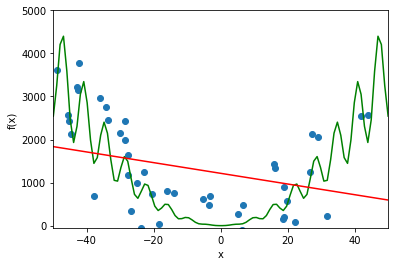

In [23]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-50, 5000)
plt.xlim(-50,50)

plt.plot(dots, f(dots), color='g')
plt.plot(dots, play_model(dots, linear_regressor), color='r')
plt.scatter(x_data, f_data)

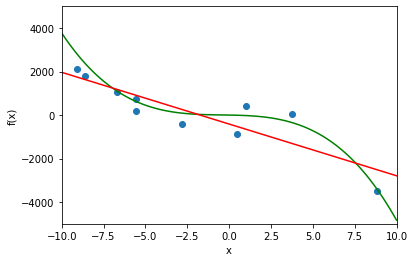

In [24]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots2, f2(dots2), color='g')
plt.plot(dots2, play_model(dots2, linear_regressor2), color='r')
plt.scatter(x_data2, f_data2)

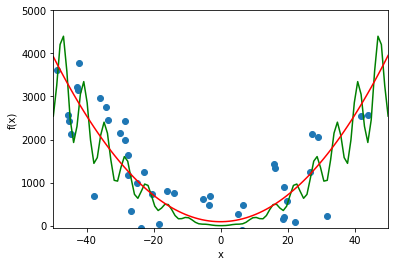

In [25]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-50, 5000)
plt.xlim(-50,50)
model = linear_model.LinearRegression()
model.fit(generate_features(x_data, 2), f_data)
plt.plot(dots, f(dots), color='g')
plt.plot(dots, play_model(dots, model), color='r')
plt.scatter(x_data, f_data)

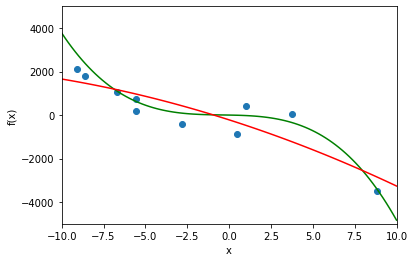

In [26]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
model2 = linear_model.LinearRegression()
model2.fit(generate_features(x_data2, 2), f_data2)
plt.plot(dots2, f2(dots2), color='g')
plt.plot(dots2, play_model(dots2, model2), color='r')
plt.scatter(x_data2, f_data2)

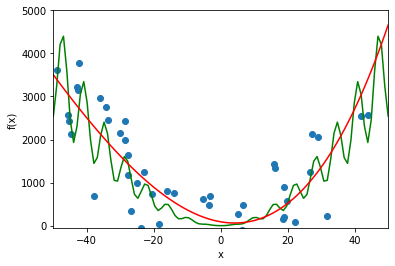

In [27]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-50, 5000)
plt.xlim(-50,50)
model = linear_model.LinearRegression()
model.fit(generate_features(x_data, 4), f_data)
plt.plot(dots, f(dots), color='g')
plt.plot(dots, play_model(dots, model), color='r')
plt.scatter(x_data, f_data)

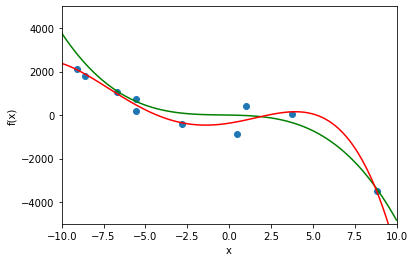

In [28]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
model2 = linear_model.LinearRegression()
model2.fit(generate_features(x_data2, 4), f_data2)
plt.plot(dots2, f2(dots2), color='g')
plt.plot(dots2, play_model(dots2, model2), color='r')
plt.scatter(x_data2, f_data2)

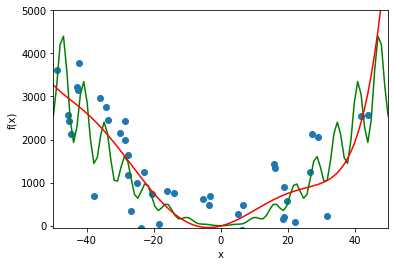

In [29]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-50, 5000)
plt.xlim(-50,50)
model = linear_model.LinearRegression()
model.fit(generate_features(x_data, 6), f_data)
plt.plot(dots, f(dots), color='g')
plt.plot(dots, play_model(dots, model), color='r')
plt.scatter(x_data, f_data)

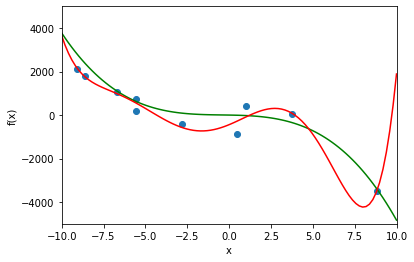

In [30]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
model2 = linear_model.LinearRegression()
model2.fit(generate_features(x_data2, 6), f_data2)
plt.plot(dots2, f2(dots2), color='g')
plt.plot(dots2, play_model(dots2, model2), color='r')
plt.scatter(x_data2, f_data2)

<b>Домашнее задание: </b>Модифицировать реализацию линейной регрессии из предыдущего урока, добавив l2 регулярязационную поправку к штрафной функции: $ +c*\sum \limits _{j}  w_{j}^2 $ и соответствующую к выражению для производной. Опробовать реализацию на примере с полиномиальными фичами 6го порядка из данного урока. При каком значении С в воспроизводимой функции не будет воспроизводить несуществующий минимум в окрестностях x=7,5?

## Масштабируемость и стохастический градиент

In [31]:
from sklearn import datasets
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, 
                                              n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [32]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [33]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred, c=0.1):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y) + c*w.dot(w.T)

In [34]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 24e+3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0
# для остановки при увеличении ошибки 
error = 1e+10
np.random.seed(1234)

c = 5e-5
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]  + 2*c*w

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    error_old = error
    error=mserror(data, new_w, target,c=c)
    errors.append(error)
    
    if iter_num>1e+2 and error>error_old:
        error=error_old
        print(error)
        break
    if iter_num %1000==0:
        print(error)
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

8190.666400278785
7852.325636549685
7485.97708475692
7112.008803738459
6717.157623934935
6304.243069393681
5882.391064609749
5409.325475095841
4936.268622247835
4465.253677651507
3973.2819735361654
3479.09090652544
2976.268882117666
2472.666075299628
1978.3926290810498
1507.5141640135053
1071.9063747340433
685.7575655559618
368.4007774676586
143.72293818728696
41.890561021682934
39.05963706375656
В случае использования стохастического градиентного спуска функционал ошибки составляет 39.0598


<b>Домашнее задание: </b> Модифицировать пример со стохастическим градиентом, реализовав в нём рассчёт градиента по десяти случайно выбираемым объектам (mini-batch градиент).  

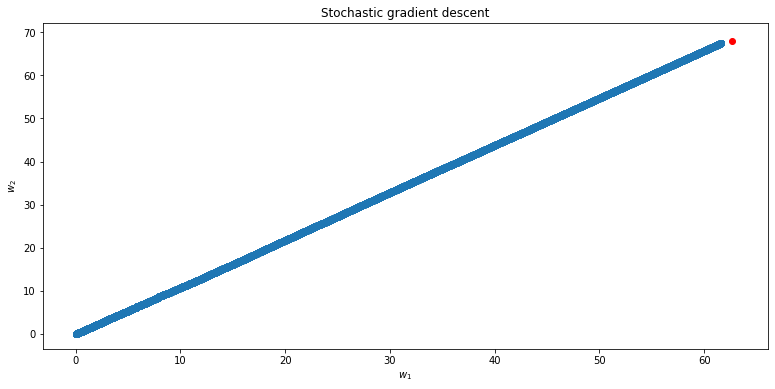

In [35]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

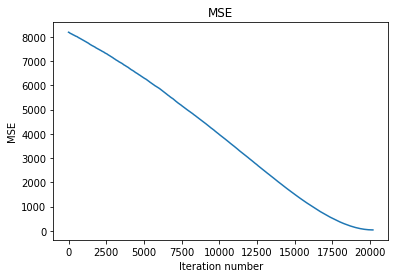

In [36]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

## Изменение функции ошибок при вычислении на ограниченном количестве данных. Аналогия

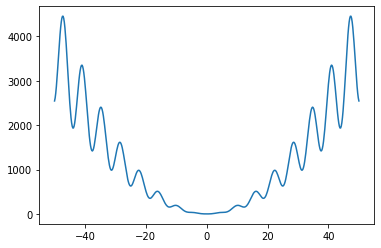

In [37]:
x = np.linspace(-50, 50, 500)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
y=func2(x)
plt.plot(x, y)
plt.show()

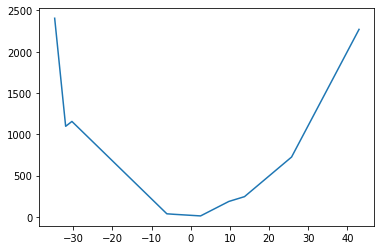

In [38]:
part=0.98
mask=np.ones(y.shape, dtype=bool)
order=np.arange(len(y))
np.random.shuffle(order)
mask[order[:round(part*len(y))]]=False
plt.plot(x[mask], y[mask])

Mini-batch